## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/chbhakat/Downloads/Cotton-Disease-Prediction-Deep-Learning-master/Cotton-Disease-Prediction-Deep-Learning-master/data/train'
valid_path = 'C:/Users/chbhakat/Downloads/Cotton-Disease-Prediction-Deep-Learning-master/Cotton-Disease-Prediction-Deep-Learning-master/data/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('C:/Users/chbhakat/Downloads/Cotton-Disease-Prediction-Deep-Learning-master/Cotton-Disease-Prediction-Deep-Learning-master/data/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/chbhakat/Downloads/Cotton-Disease-Prediction-Deep-Learning-master/Cotton-Disease-Prediction-Deep-Learning-master/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('C:/Users/chbhakat/Downloads/Cotton-Disease-Prediction-Deep-Learning-master/Cotton-Disease-Prediction-Deep-Learning-master/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 89s 1s/step - loss: 1.4044 - accuracy: 0.7899 - val_loss: 0.4265 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 73s 1s/step - loss: 0.7112 - accuracy: 0.8883 - val_loss: 1.1763 - val_accuracy: 0.6667
Epoch 3/20
61/61 [==============================] - 74s 1s/step - loss: 0.5448 - accuracy: 0.9175 - val_loss: 1.1127 - val_accuracy: 0.7778
Epoch 4/20
61/61 [==============================] - 83s 1s/step - loss: 0.4513 - accuracy: 0.9216 - val_loss: 0.3163 - val_accuracy: 0.8889
Epoch 5/20
61/61 [==============================] - 87s 1s/step - loss: 0.5213 - accuracy: 0.9159 - val_loss: 0.2055 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 79s 1s/step - loss: 0.4628 - accuracy: 0.9334 - val_loss: 0.0555 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 87s 1s/step - loss: 0.4877 - acc

In [15]:
import matplotlib.pyplot as plt

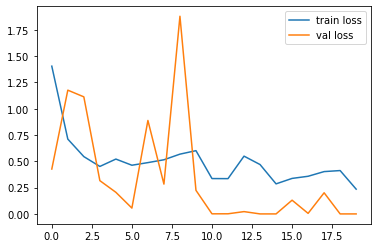

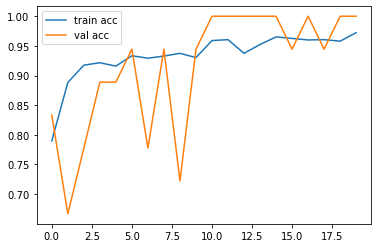

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[2.93351498e-17, 1.51828550e-11, 1.00000000e+00, 8.71302359e-28],
       [5.99289001e-21, 8.87371598e-08, 1.87514195e-16, 9.99999881e-01],
       [0.00000000e+00, 1.04244828e-16, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 3.76962771e-31, 1.99835400e-26],
       [5.61664908e-29, 1.00000000e+00, 8.92585938e-24, 1.71064335e-14],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31123695e-27, 1.42975011e-27, 2.09940176e-32, 1.00000000e+00],
       [6.11400170e-22, 4.35523673e-10, 2.65861508e-24, 1.00000000e+00],
       [6.65962729e-10, 8.55538080e-23, 1.00000000e+00, 4.03347431e-27],
       [1.22657527e-33, 1.00000000e+00, 1.69758533e-27, 3.94139889e-16],
       [6.95846710e-25, 0.00000000e+00, 1.00000000e+00, 1.69389030e-36],
       [1.00000000e+00, 4.70093307e-28, 2.36026828e-24, 3.62964440e-38],
       [9.99996901e-01, 3.12280758e-06, 3.30408258e-26, 2.50404939e-21],
       [4.98909779e-13, 3.99510372e-25, 1.00000000e

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 3, 3, 1, 1, 1, 3, 3, 2, 1, 2, 0, 0, 2, 0, 1, 2, 3], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

OSError: SavedModel file does not exist at: model_resnet50.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__